<a href="https://colab.research.google.com/github/Nik-Kras/ZeroToMastery-TensorFlow-MyNotes/blob/main/04%20Computer%20Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

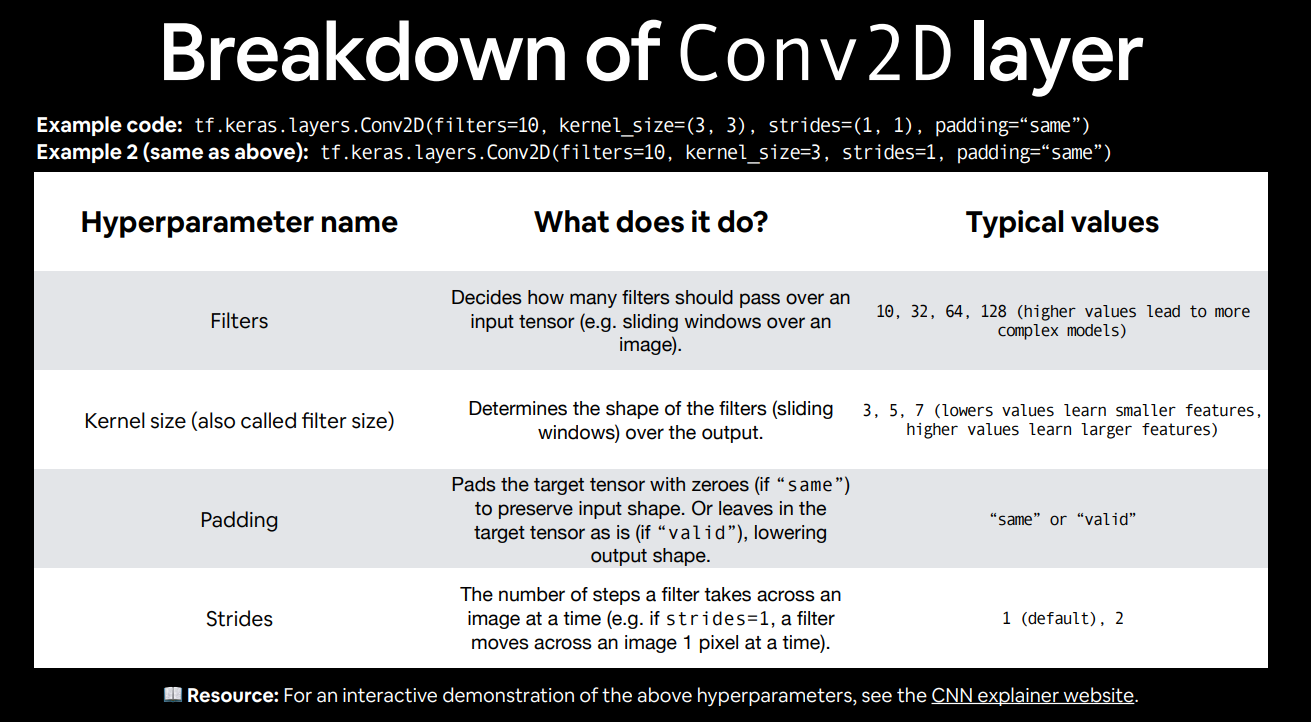

# Import dataset

In [ ]:
import zipfile

# Dowload a dataset in .zip
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unpack / unzip dataset
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-06 00:30:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   103MB/s    in 1.0s    

2022-05-06 00:30:18 (103 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Visualize data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
s = !ls pizza_steak/train/pizza
print("Data type of list in folder: ", type(s))
print("First 50 characters of list: \n", s.nlstr[0:50])

Data type of list in folder:  <class 'IPython.utils.text.SList'>
First 50 characters of list: 
 1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg


```
Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
 ```


**Load** **variables**

Browse and explore directories

In [ ]:
# A new way: os.walk
import os

for root, dirs, files in os.walk("pizza_steak"):
  print(f"There are #{len(dirs)} directories and #{len(files)} files In the directory {root}")


There are #2 directories and #0 files In the directory pizza_steak
There are #2 directories and #0 files In the directory pizza_steak/train
There are #0 directories and #750 files In the directory pizza_steak/train/steak
There are #0 directories and #750 files In the directory pizza_steak/train/pizza
There are #2 directories and #0 files In the directory pizza_steak/test
There are #0 directories and #250 files In the directory pizza_steak/test/steak
There are #0 directories and #250 files In the directory pizza_steak/test/pizza


In [ ]:
# To make multiline select-comment press ctrl+/
# import os

# for (root,dirs,files) in os.walk('pizza_steak'):
#         print (root)
#         print (dirs)
#         print (files)
#         print ('--------------------------------')
#         print(f"There are {len(dirs)} directories and {len(files)} images in '{root}'.")
#         print ('********************************')

Getting names of classes

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


View image

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

In [ ]:
os.listdir('pizza_steak/test/steak')[0:10]

['2475366.jpg',
 '2943601.jpg',
 '3352834.jpg',
 '1206166.jpg',
 '515830.jpg',
 '1451299.jpg',
 '3293212.jpg',
 '1375503.jpg',
 '562855.jpg',
 '221604.jpg']

In [ ]:
random.sample(os.listdir('pizza_steak/test/steak'), 3)

['3503350.jpg', '2069289.jpg', '3013404.jpg']

Image shape: (306, 512, 3)


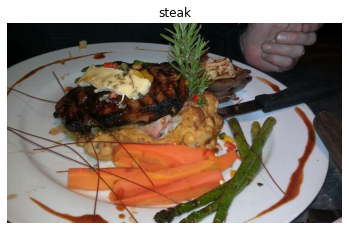

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
img.shape

(306, 512, 3)

In [ ]:
img[1:10,1:10,1]

array([[3, 3, 4, 4, 5, 5, 5, 7, 7],
       [3, 3, 4, 4, 5, 5, 5, 9, 7],
       [3, 3, 4, 4, 5, 5, 5, 7, 7],
       [3, 3, 4, 4, 5, 5, 5, 5, 5],
       [3, 3, 4, 4, 5, 5, 5, 3, 4],
       [3, 3, 4, 4, 5, 5, 5, 5, 5],
       [3, 3, 4, 4, 5, 5, 5, 7, 6],
       [2, 3, 4, 5, 5, 5, 5, 8, 7],
       [2, 3, 4, 4, 5, 5, 4, 6, 5]], dtype=uint8)

In [ ]:
img[1:10,1:10,1] / 255.0

array([[0.01176471, 0.01176471, 0.01568627, 0.01568627, 0.01960784,
        0.01960784, 0.01960784, 0.02745098, 0.02745098],
       [0.01176471, 0.01176471, 0.01568627, 0.01568627, 0.01960784,
        0.01960784, 0.01960784, 0.03529412, 0.02745098],
       [0.01176471, 0.01176471, 0.01568627, 0.01568627, 0.01960784,
        0.01960784, 0.01960784, 0.02745098, 0.02745098],
       [0.01176471, 0.01176471, 0.01568627, 0.01568627, 0.01960784,
        0.01960784, 0.01960784, 0.01960784, 0.01960784],
       [0.01176471, 0.01176471, 0.01568627, 0.01568627, 0.01960784,
        0.01960784, 0.01960784, 0.01176471, 0.01568627],
       [0.01176471, 0.01176471, 0.01568627, 0.01568627, 0.01960784,
        0.01960784, 0.01960784, 0.01960784, 0.01960784],
       [0.01176471, 0.01176471, 0.01568627, 0.01568627, 0.01960784,
        0.01960784, 0.01960784, 0.02745098, 0.02352941],
       [0.00784314, 0.01176471, 0.01568627, 0.01960784, 0.01960784,
        0.01960784, 0.01960784, 0.03137255, 0.02745098],


### Typical architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. What you see below are some components you'd expect to find in a traditional CNN.

Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

What we know so far abot data:

1.   It has 2 classes
2.   Train consists of 750 samples for each class and test has 250
3.   The samples has 3 colours but differ in size

From the paper on dataset we know that RF deals with classification with 50.76%, but we reduced classes to two, so we can't really compare them

Usually we build a baseline (RF) and then trying to beat it with new model



Using already prepared network!

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 265ms/step - loss: 0.5367 - accuracy: 0.7173 - val_loss: 0.3539 - val_accuracy: 0.8520
Epoch 2/5
47/47 [==============================] - 11s 240ms/step - loss: 0.4036 - accuracy: 0.8187 - val_loss: 0.3467 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3772 - accuracy: 0.8347 - val_loss: 0.3390 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 16s 338ms/step - loss: 0.3441 - accuracy: 0.8440 - val_loss: 0.3105 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 12s 251ms/step - loss: 0.3153 - accuracy: 0.8707 - val_loss: 0.2975 - val_accuracy: 0.8720


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
history_1.history

{'accuracy': [0.7173333168029785,
  0.8186666369438171,
  0.8346666693687439,
  0.843999981880188,
  0.8706666827201843],
 'loss': [0.5367389917373657,
  0.4036328196525574,
  0.37718477845191956,
  0.34413114190101624,
  0.3152760863304138],
 'val_accuracy': [0.8519999980926514,
  0.8679999709129333,
  0.8500000238418579,
  0.8740000128746033,
  0.871999979019165],
 'val_loss': [0.3538820445537567,
  0.3466964364051819,
  0.3390045166015625,
  0.3104754686355591,
  0.29745912551879883]}

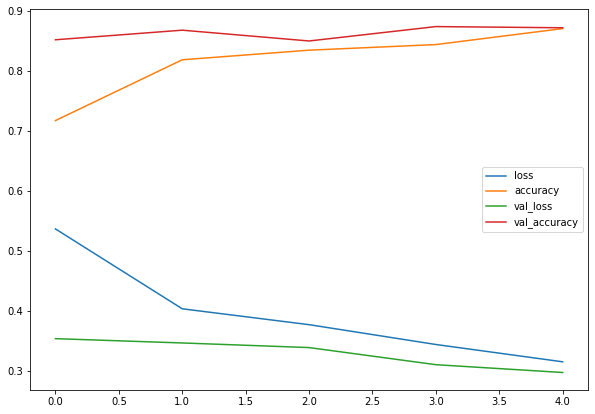

In [ ]:
import pandas as pd

pd.DataFrame(history_1.history).plot(figsize=(10,7));

# Compare: Convolutional vs FeedForward
Just to compare the results I will try to put the problem to a simple feedforward network. Afterwards I will conduct a comparison of accuracy and number of trainable weights of networks


In [1]:
# Set the random seed
tf.random.set_seed(1203)

# Set the scale (0-1) generators for images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set the pathes to train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Create training and validating datasets
# Apply scaling, batching, reshaping to 224x224, etc...
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=1203)
valid_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=1203)
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with 100 neurons
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation="relu"),                                      
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="softmax")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


NameError: ignored

In [ ]:
pd.DataFrame(history_2.history).plot(figsize=(10,7));
model_2.summary()

So, from the information above it could be mentioned that 

* CNN network had only 31k parameters to learn and it performed with accuracy of 89%. 
* While FeedForward NN had 15M parameters and performed with accuracy of 50%, which for binary classification means absolutely absence of learning!

To continue an experiment I will try expand the architecture and see if it influence the accuracy for FNN

In [ ]:
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with more neurons
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation="relu"),                                      
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
model_3.summary()

Doubling the number of parameters had no effect on performance.

Will try to change number of epochs

In [ ]:
# Define a FeedForward Neural Network
# Set the architecture of 4 hidden layers with more neurons
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(200, activation="relu"),                                      
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(500, activation="relu"),
  tf.keras.layers.Dense(200, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")                                   
])

# Compile the model
# Set the Adam optimizer, define the loss to be crossentropy, 
# set to record accuracy
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model and record metrics for epochs
history_4 = model_4.fit(train_data,
                        epochs=25,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10,7));

As seen from the figure above: The increase of epochs had no effect of the performance. 

The accuracy and all other parameters oscillated right after around 5 epochs